In [1]:
#requirements
#pip3 install pandas numpy prophet

In [ ]:
import pandas as pd
import numpy as np

: 

In [3]:
df = pd.read_csv('../data/datasets/onemonthprocessed_nodeload5.csv')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                    ds     y
0  14/05/2024 04:37:05  2.90
1  14/05/2024 04:37:10  2.90
2  14/05/2024 04:37:15  2.95
3  14/05/2024 04:37:20  2.95
4  14/05/2024 04:37:25  2.95
                         ds     y
526466  13/06/2024 23:59:40  2.53
526467  13/06/2024 23:59:45  2.56
526468  13/06/2024 23:59:50  2.56
526469  13/06/2024 23:59:55  2.56
526470  14/06/2024 00:00:00  2.56
                   y
count  526471.000000
mean        4.341689
std         2.203016
min         0.860000
25%         2.210000
50%         4.640000
75%         5.990000
max        11.640000
ds     object
y     float64
dtype: object
526471


In [4]:
from prophet import Prophet
df['cap']=100
m = Prophet(growth='logistic')
m.fit(df) 

#future = m.make_future_dataframe(periods=1, freq='H')

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
12:27:27 - cmdstanpy - INFO - Chain [1] start processing
12:37:13 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=30, freq='D')

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


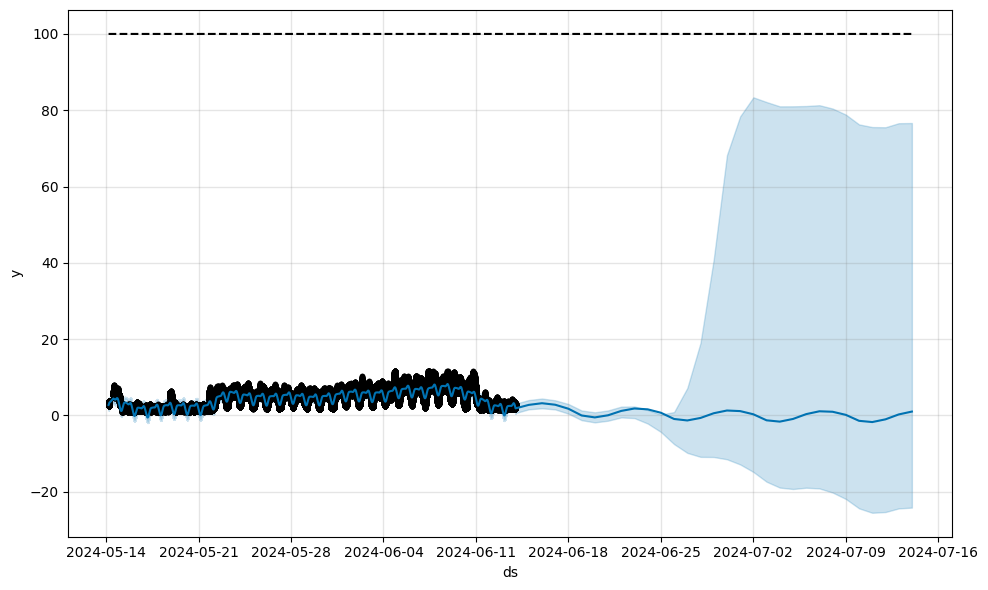

In [6]:
future['cap'] = 100

fcst = m.predict(future)
fig = m.plot(fcst)

In [7]:
predicted_results = fcst[['ds', 'yhat', 'yhat_lower','yhat_upper', 'trend','trend_lower', 'trend_upper']]
print(predicted_results.head())

                   ds      yhat  yhat_lower  yhat_upper     trend  \
0 2024-05-14 04:37:05  2.748970    1.426997    3.986319  4.396291   
1 2024-05-14 04:37:10  2.749311    1.571359    4.053805  4.396290   
2 2024-05-14 04:37:15  2.749654    1.482886    3.996239  4.396289   
3 2024-05-14 04:37:20  2.749997    1.478944    4.083083  4.396288   
4 2024-05-14 04:37:25  2.750340    1.358274    3.996670  4.396287   

   trend_lower  trend_upper  
0     4.396291     4.396291  
1     4.396290     4.396290  
2     4.396289     4.396289  
3     4.396288     4.396288  
4     4.396287     4.396287  


In [9]:
predicted_results.to_csv('../data/predicted/fbproph_month_predicted_nodeload5.csv', index=False)

/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/mayurshamkuwar/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

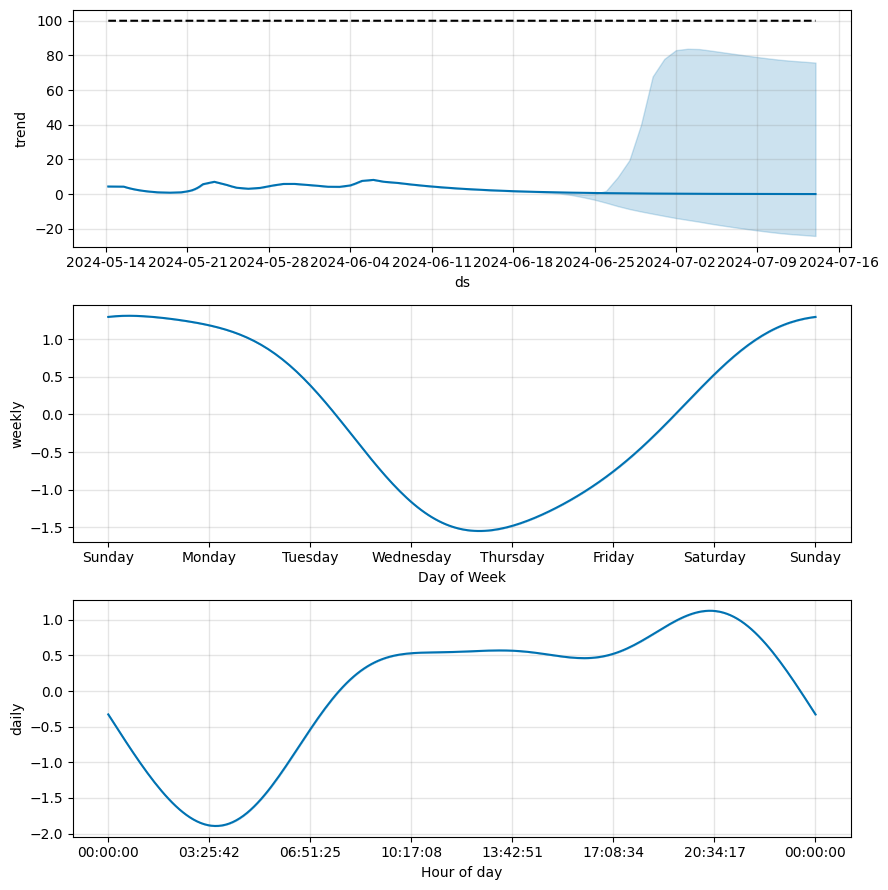

In [10]:
fig1 = m.plot_components(fcst)

In [11]:
print(predicted_results.describe())

                                  ds           yhat     yhat_lower  \
count                         526471  526471.000000  526471.000000   
mean   2024-05-29 18:12:02.777864704       4.351126       3.079770   
min              2024-05-14 04:37:05      -1.737165     -25.516504   
25%       2024-05-22 03:17:02.500000       2.711413       1.461486   
50%              2024-05-29 18:09:50       4.704196       3.429968   
75%       2024-06-06 09:03:47.500000       5.898251       4.619016   
max              2024-07-14 00:00:00       8.231043       7.106690   
std                              NaN       1.942725       1.947567   

          yhat_upper          trend    trend_lower    trend_upper  
count  526471.000000  526471.000000  526471.000000  526471.000000  
mean        5.624148       4.442011       4.441400       4.444388  
min         0.229685       0.045663     -24.129560      -0.212967  
25%         4.002785       3.326156       3.326156       3.326292  
50%         5.971342       4.

In [12]:
print(predicted_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526471 entries, 0 to 526470
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ds           526471 non-null  datetime64[ns]
 1   yhat         526471 non-null  float64       
 2   yhat_lower   526471 non-null  float64       
 3   yhat_upper   526471 non-null  float64       
 4   trend        526471 non-null  float64       
 5   trend_lower  526471 non-null  float64       
 6   trend_upper  526471 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 28.1 MB
None
